## Reinforcement Learning Stock Trader

Notebook summarizing the results after running the RL trader.\
The RL trader aims to maximize the profit by doing a daily rebalancing of the portfolio.

- The model trains on the first half of the stock prices and tests on the second half.
- The model predicts what action to take: buy/sell/hold based on historical data.
- An epsilon-greedy policy is used to allow for exploration.

Prediction Model:

- Linear Regression using Gradient Descent with Momentum



In [77]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot
from random import randint

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [78]:
''' To run the algorithm in either train or test mode, run the following command in the terminal:
python linear_rl_trader.py -m train 
python linear_rl_trader.py -m test 
'''

# We import the results
rewards_train = np.load(f'linear_rl_trader_rewards/train.npy')
rewards_test = np.load(f'linear_rl_trader_rewards/test.npy')
initial_investment = 20000

percentage_train = 100*(rewards_train-initial_investment)/initial_investment
percentage_test = 100*(rewards_test-initial_investment)/initial_investment

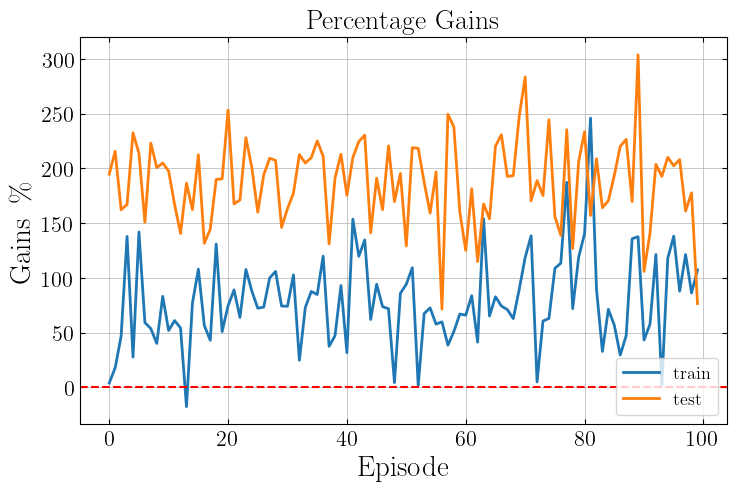

In [79]:
fig = plt.figure(figsize=(7.4, 5)) 
ax = fig.gca()

# We plot the results from the last 100 episodes
plt.plot(percentage_train[len(percentage_train)-100:len(percentage_train)], linewidth=2., label=r'${\rm train}$')
plt.plot(percentage_test[len(percentage_test)-100:len(percentage_test)], linewidth=2., label=r'${\rm test}$')

plt.title(r'${\rm Percentage\,\, Gains}$', fontsize=20, color='black')  
ax.set_xlabel(r'${\rm Episode}$', fontsize=21)
ax.set_ylabel(r'${\rm Gains \,\,\, \%} $', fontsize=21)

plt.tight_layout()
    
ax.tick_params(axis='both', which='both', direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='major', labelsize=16)

plt.grid(linewidth=0.5)
ax.axhline(0, xmin=0, xmax=1, color='red',  linewidth=1.5, ls='dashed')
plt.legend(prop={'size':13},loc='lower right')
   
plt.show()
fig.savefig('gains.png')

In [80]:
# Import data with the stock prices
#df = pd.read_csv('data/aapl_msi_sbux.csv')
df = pd.read_csv('data/stock_prices.csv')
stock_prices = df.values 

# Import the data file with the actions
actions = pd.read_csv(f'linear_rl_trader_rewards/actions.csv')
actions = actions.drop(columns=['Unnamed: 0'])

n_timesteps, n_stocks = df.values.shape 
n_train = n_timesteps//2

actions.index = np.arange(n_train, n_timesteps-1)

3


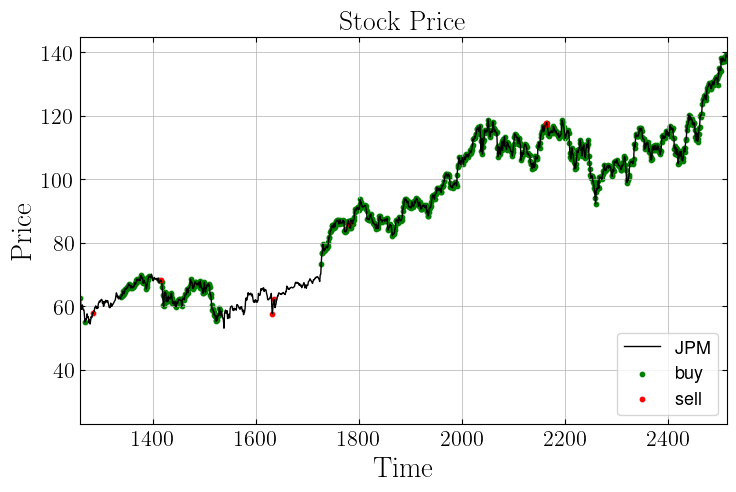

In [91]:
sell_indices = []
sell_prices = []
hold_indices = []
hold_prices = []
buy_indices = []
buy_prices = []

# Select a random stock for illustration 
stock_index = randint(0,n_stocks-1)
str_stock = 'Actions' + str(stock_index)
print(stock_index)

for i in actions.index:
  if actions[str_stock].loc[i] == 0:
    sell_indices.append(i)
    sell_prices.append(df.values[i,stock_index])
  elif actions[str_stock].loc[i] == 1:
    hold_indices.append(i)  
    hold_prices.append(df.values[i,stock_index])
  elif actions[str_stock].loc[i] == 2:
    buy_indices.append(i)  
    buy_prices.append(df.values[i,stock_index])
    
    
fig = plt.figure(figsize=(7.4, 5)) 
ax = fig.gca()

plt.plot(df.values[:,stock_index], label=df.columns[stock_index], color='black', linewidth=1)

plt.scatter(buy_indices, buy_prices, color='green', s=10, label='buy')
#plt.scatter(hold_indices, hold_prices, color='purple', s=10)
plt.scatter(sell_indices, sell_prices, color='red', s=10, label='sell')

plt.title(r'${\rm Stock\,\, Price}$', fontsize=20, color='black')  
ax.set_xlabel(r'${\rm Time}$', fontsize=21)
ax.set_ylabel(r'${\rm Price} $', fontsize=21)

ax.set_xlim(n_train,n_timesteps-1)
#ax.set_xlim(850, 1050)
#ax.set_ylim(90, 150)

plt.tight_layout()
    
ax.tick_params(axis='both', which='both', direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='major', labelsize=16)

plt.grid(linewidth=0.5)
plt.legend(prop={'size':13},loc='lower right')
    
plt.show()
fig.savefig('buy_sell.png')

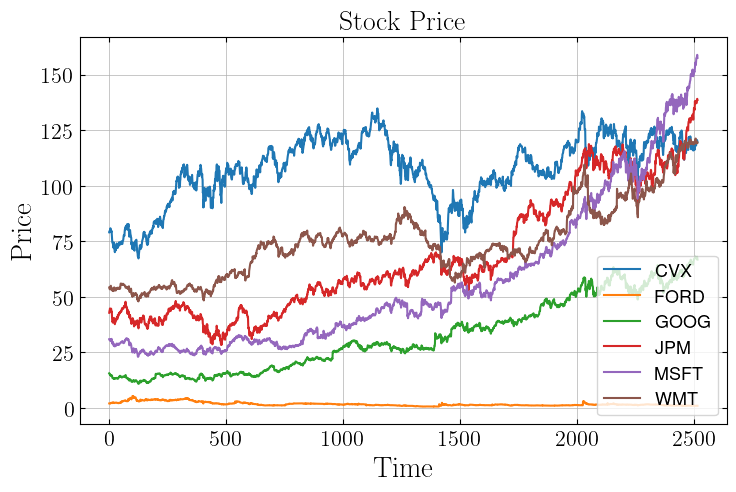

In [83]:
fig = plt.figure(figsize=(7.4, 5)) 
ax = fig.gca()

for i in range(n_stocks):
  plt.plot(df.values[:,i], label=df.columns[i])

plt.title(r'${\rm Stock\,\, Price}$', fontsize=20, color='black')  
ax.set_xlabel(r'${\rm Time}$', fontsize=21)
ax.set_ylabel(r'${\rm Price} $', fontsize=21)

#ax.set_xlim(800, 1000)

plt.tight_layout()
    
ax.tick_params(axis='both', which='both', direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='major', labelsize=16)

plt.grid(linewidth=0.5)
plt.legend(prop={'size':13},loc='lower right')
    
plt.show()
fig.savefig('stock_prices.png')


TRAIN: Average reward: 72.97 %,  Min: -24.25 %,  Max: 245.96 % 

TEST: Average reward: 188.53 %,  Min: 71.50 %,  Max: 303.75 %


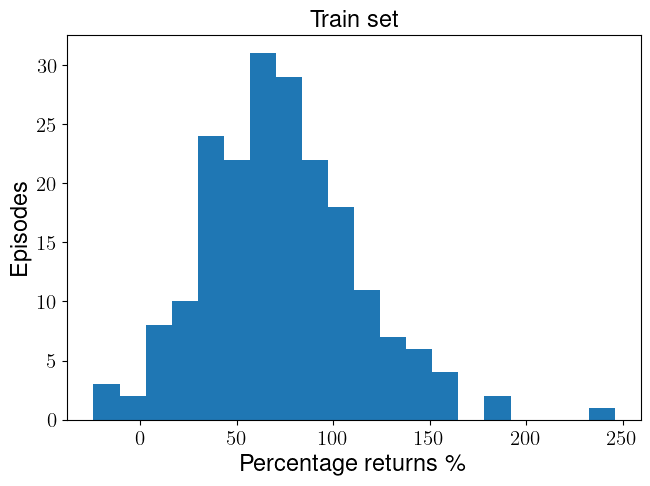

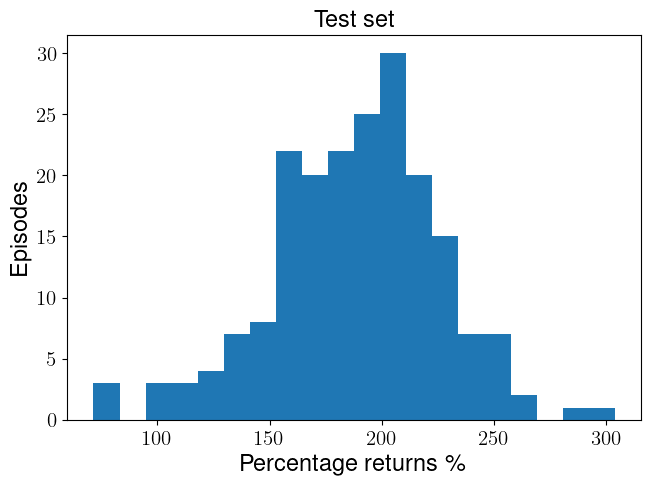

In [84]:
print(f'\nTRAIN: Average reward: {percentage_train.mean():.2f} %,  Min: {percentage_train.min():.2f} %,  Max: {percentage_train.max():.2f} % \n')
print(f'TEST: Average reward: {percentage_test.mean():.2f} %,  Min: {percentage_test.min():.2f} %,  Max: {percentage_test.max():.2f} %')


fig = plt.figure(figsize=(7.4, 5)) 
ax = fig.gca()
plt.title('Train set', fontsize=17)
plt.hist(percentage_train, bins=20)
ax.set_ylabel('Episodes', fontsize=17)
ax.set_xlabel('Percentage returns \%', fontsize=17)
ax.tick_params(labelsize=15)
plt.show()

fig = plt.figure(figsize=(7.4, 5)) 
ax = fig.gca()
plt.title('Test set', fontsize=17)
plt.hist(percentage_test, bins=20)
ax.set_ylabel('Episodes', fontsize=17)
ax.set_xlabel('Percentage returns \%', fontsize=17)
ax.tick_params(labelsize=15)
plt.show()